In [3]:
# -*- coding: utf-8 -*-

from numpy import *

In [4]:
def loadDataSet():
    """
    # return: dataMat array[[]], labelMat array[] 样本集m*n和样本分类1*m
    """
    dataMat = [] # 样本数据 m*n
    labelMat = [] # 样本分类 1*m
    fr = open('testSet.txt') # 从文件中读取样本数据，m*(2 feature + 1 label)
    for line in fr.readlines():
        lineArr = line.strip().split()
        # 这里增加1.0的具体解释：
        # 由于后续会使用矩阵化来计算梯度下降，所以需要对θ0进行矩阵运算，因此设置多设置了一个特征x0=1.0
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])

        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

In [5]:
def sigmoid(inX):
    """
    # input inX : matrix m*1 m个样本的置信度
    # return : matrix m*1 m个样本的假设函数值，即置信概率
    """
    return 1.0 / (1 + exp(-inX))

In [12]:
def gradAscent(dataMatIn, classLabels, alpha = 0.001, maxCycles = 500):
    """
    # function: 梯度下降法
    # input dataMatIn: array[[]] 样本集m*n
    # input classLabels: array[] 样本分类1*m
    # input alpha # 学习率
    # input maxCycles # 迭代次数
    # output weights: array[] θ权重n*1
    """
    dataMatrix = mat(dataMatIn) # 将样本转为矩阵 m*n
    labelMat = mat(classLabels).transpose() # 将样本分类转为矩阵 m*1
    m, n = shape(dataMatrix) # 获取样本数量m，特征量n
    weights = ones((n, 1)) # 设置初始θ权重矩阵 n*1
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights) # 计算h值矩阵，h为假设函数值sigmoid
        error = (labelMat - h) # 计算误差值 error为矩阵m*1
        weights = weights + alpha * dataMatrix.transpose() * error # 迭代θ权重 由损失函数对于θ的求导得出
    return weights

In [13]:
def stocGradAscent0(dataMatrix, classLabels, alpha = 0.001):
    # function: 随机梯度下降法（每个样本仅迭代一次）
    # input dataMatrix: array[[]] 样本集m*n
    # input classLabels: array[] 样本分类1*m
    # input alpha # 学习率
    # output weights: array[] θ权重n*1
    m, n = shape(dataMatrix) # 获取样本数量m，特征量n
    weights = ones(n) # 设置初始θ权重 n*1
    for i in range(m): # 对每个样本进行一次针对性的调整
        h = sigmoid(sum(dataMatrix[i] * weights)) # 计算置信概率
        error = classLabels[i] - h # 计算偏导数中的误差
        weights = weights + alpha * error * dataMatrix[i] # 用梯度下降法调整一次
    return weights

In [14]:
def stocGradAscent1(dataMatrix, classLabels, alpha_base = 0.01, numIter = 150):
    # function: 随机梯度下降法
    # input dataMatrix: array[[]] 样本集m*n
    # input classLabels: array[] 样本分类1*m
    # input alpha_base  基础学习率
    # input numIter : 整体迭代次数
    # output weights: array[] θ权重n*1
    m, n = shape(dataMatrix) # 获取样本数量m，特征量n
    weights = ones(n) # 设置初始θ权重，n*1，值全为1
    for j in range(numIter): # 迭代学习
        dataIndex = range(m) # 复制一个样本标号的数组，由于随机迭代需要不断的删除样本，因此复制此数据来不断做整体迭代
        for i in range(m): # 迭代每个样本
            alpha = 4 / (1.0 + j + i) + 0.01 # 随着迭代次数的增加，降低学习率，为避免在最优解附近由于学习率过高，越过最优解
            randIndex = int(random.uniform(0, len(dataIndex))) # 在剩余的样本中随机取一个样本
            h = sigmoid(sum(dataMatrix[randIndex]) * weights) # 计算执行概率
            error = classLabels[randIndex] - h # 计算误差
            weights = weights + alpha * error * dataMatrix[randIndex] # 迭代权重
            del(dataIndex[randIndex]) # 删除该样本
    return weights


In [15]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataMat)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i] == 1):
            xcord1.append(dataArr[i, 1]); ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1]); ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker = 's')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

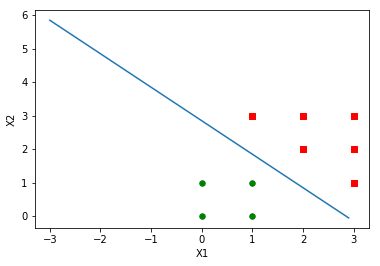

In [16]:
# run
dataArr, labelMat = loadDataSet()
weights = gradAscent(dataArr, labelMat, 1, 500)
plotBestFit(weights.getA())
#weights = stocGradAscent0(array(dataArr), labelMat, 5) # array(dataArr)是为了将dataArr转换为矩阵
#plotBestFit(weights)
#weights = stocGradAscent1(array(dataArr), labelMat, 1, 2000)
#plotBestFit(weights)